In [1]:
'loading the essentials'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [21]:
'open the datasets you use and choose for which data set you want to calculate the island rule'
w1 = xr.open_dataset('wind1_TOTAL_1800.nc') 
w2 = xr.open_dataset('wind2_TOTAL_1900.nc')
dsT = xr.open_dataset('areaTbox.nc')

w = w1
n = 1800
Path42S = 10
Path46S = 9
q = Path46S

In [22]:
'''
Results voor Godfreys island rule:
'''
#normal wind 42 graden:
ITFn42 = 17.8602065

#normal wind 46 graden:
ITFn46 = 21.00566181

#double wind 42 graden:
ITFd42 = 35.720413

#double wind 46 graden:
ITFd46 = 42.01132361

ITF42w1 = np.empty(1800)
ITF42w1.fill(ITFn42)
ITF42w2 = np.empty(1800)
ITF42w2.fill(ITFd42)
ITF46w1 = np.empty(1800)
ITF46w1.fill(ITFn46)
ITF46w2 = np.empty(1800)
ITF46w2.fill(ITFd46)

# Now calculating Psi 

In [6]:
#Calculating PSI for wind 1 and wind 2
PSI_stream1 = w1.psi
PSI_stream2 = w2.psi

PSI1_A = np.array([])
PSI2_A = np.array([])

for x in range(0,n):
    result = PSI_stream1[x,17,31]/1000000
    PSI1_A = np.append(PSI1_A, result)

for x in range(0,n):
    result = PSI_stream2[x,17,31]/1000000
    PSI2_A = np.append(PSI2_A, result)


# Now calculating the upwelling at depth 1080, 1420 and 1810 m


In [23]:
# Calculating the upwelling for wind 1 and wind 2 by integrating the vertical velocity
# Reading data for vertical velocity w
wv1 = w1.w
wv2 = w2.w

# load area 
ds = dsT.area_t

# multiply by area to get transport 
wds1 = - ds * wv1
wds2 = - ds * wv2

In [10]:
# z[5] = depth of 1810 m.
wtot1_list_z5 = np.array([])
wtot2_list_z5 = np.array([])

for x in range(0,n):
    result = (np.sum(wds1[12:34,30:68,x,5]) + np.sum(wds1[q:12,36:73,x,5]) + np.sum(wds1[12:23,68:73,x,5]))/1000000
    wtot1_list_z5 = np.append(wtot1_list_z5, result)
for x in range(0,n):
    result = (np.sum(wds2[12:34,30:68,x,5]) + np.sum(wds2[q:12,36:73,x,5]) + np.sum(wds2[12:23,68:73,x,5]))/1000000
    wtot2_list_z5 = np.append(wtot2_list_z5, result)

In [11]:
# z[6] = depth of 1420 m.
wtot1_list_z6 = np.array([])
wtot2_list_z6 = np.array([])

for x in range(0,n):
    result = (np.sum(wds1[12:34,30:68,x,6]) + np.sum(wds1[q:12,36:73,x,6]) + np.sum(wds1[12:23,68:73,x,6]))/1000000
    wtot1_list_z6 = np.append(wtot1_list_z6, result)
for x in range(0,n):
    result = (np.sum(wds2[12:34,30:68,x,6]) + np.sum(wds2[q:12,36:73,x,6]) + np.sum(wds2[12:23,68:73,x,6]))/1000000
    wtot2_list_z6 = np.append(wtot2_list_z6, result)

In [12]:
# z[7] = depth of 1080 m.
wtot1_list_z7 = np.array([])
wtot2_list_z7 = np.array([])

for x in range(0,n):
    result = (np.sum(wds1[12:34,30:68,x,7]) + np.sum(wds1[q:12,36:73,x,7]) + np.sum(wds1[12:23,68:73,x,7]))/1000000
    wtot1_list_z7 = np.append(wtot1_list_z7, result)
for x in range(0,n):
    result = (np.sum(wds2[12:34,30:68,x,7]) + np.sum(wds2[q:12,36:73,x,7]) + np.sum(wds2[12:23,68:73,x,7]))/1000000
    wtot2_list_z7 = np.append(wtot2_list_z7, result)

# Rename Upwelling

In [24]:
#wind1 upwell 1800 yr
upwell1z5 = wtot1_list_z5
upwell1z6 = wtot1_list_z6
upwell1z7 = wtot1_list_z7

#wind2 upwell 1800 yr
upwell2z5 = wtot2_list_z5
upwell2z6 = wtot2_list_z6
upwell2z7 = wtot2_list_z7

# Plots of the results

In [16]:
plt.rcParams["font.family"] = 'Palatino'
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20
LEGEND_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [17]:
#constant factor -1
c1 = -1

## Results for WIND1

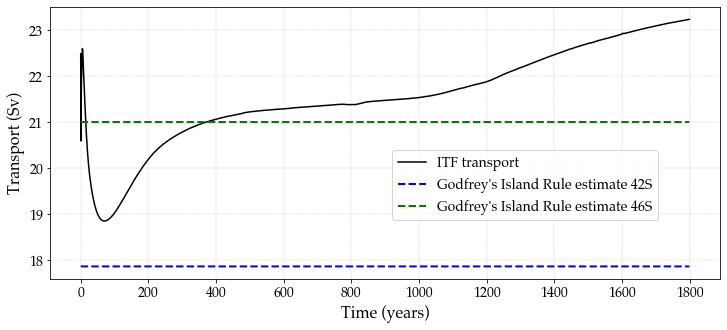

In [18]:
#GODFREYS ISLAND RULE - WIND1 - Path 42S and Path 46S
a = 0
b = 1800

plt.rcParams["figure.figsize"] = (12,5)
plt.ylabel('Transport (Sv)')
plt.xlabel('Time (years)')
plt.grid(color='grey', linestyle='dashed', linewidth=.2)
plt.plot(-PSI1_A[a:b], color = 'black',label='ITF transport')
plt.plot(ITF42w1, color='blue',     linestyle='dashed', linewidth=2,label='Godfrey\'s Island Rule estimate 42S')
plt.plot(ITF46w1[a:b], color='green', linestyle='dashed', linewidth=2,label='Godfrey\'s Island Rule estimate 46S')
plt.legend(bbox_to_anchor=(.5, .5))
plt.xticks(np.arange(a, b+1, 200.0))
#plt.yticks(np.arange(-23, -18, 1))
plt.savefig('R_PSI_GIR_w1.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# AMENDED ISLAND RULE - WIND1 - 42S
a = 0
b = 1800

plt.rcParams["figure.figsize"] = (12,6)
plt.ylabel('Transport (Sv)')
plt.xlabel('Time (years)')
plt.grid(color='grey', linestyle='dashed', linewidth=.2)
plt.plot(-PSI1_A[a:b], color = 'black',label='ITF transport')
plt.plot(ITF42w1[a:b], color='green', linestyle='dashed', linewidth=2,label='Godfrey\'s Island Rule estimate 42S')
plt.plot(ITF42w1[a:b]+c1*upwell1z5[a:b], color='pink', linestyle='dashed', label='Amended Island Rule, z = -1810m')
plt.plot(ITF42w1[a:b]+c1*upwell1z6[a:b], color='orange', linestyle='dashed', label='Amended Island Rule, z = -1420m')
plt.plot(ITF42w1[a:b]+c1*upwell1z7[a:b], color='red', linestyle='dashed', label='Amended Island Rule, z = -1080m')
plt.legend()
plt.xticks(np.arange(a, b+1, 200.0))
plt.yticks(np.arange(12, 28, 2))
plt.savefig('R_PSI_AIR_w1_42S.png', dpi=300,bbox_inches='tight')
plt.show()

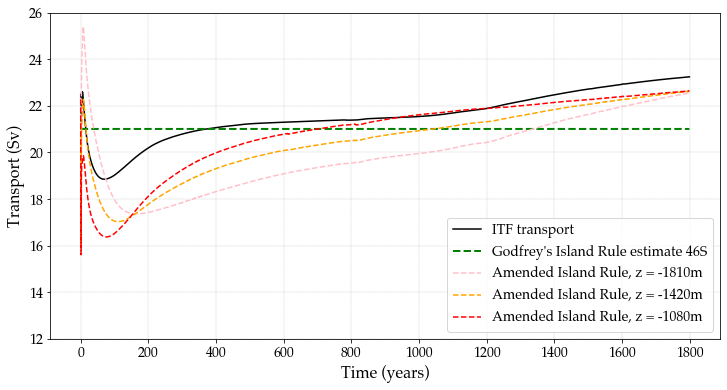

In [19]:
# AMENDED ISLAND RULE - WIND1 - 46S
a = 0
b = 1800

plt.rcParams["figure.figsize"] = (12,6)
plt.ylabel('Transport (Sv)')
plt.xlabel('Time (years)')
plt.grid(color='grey', linestyle='dashed', linewidth=.2)
plt.plot(-PSI1_A[a:b], color = 'black',label='ITF transport')
plt.plot(ITF46w1[a:b], color='green', linestyle='dashed', linewidth=2,label='Godfrey\'s Island Rule estimate 46S')
plt.plot(ITF46w1[a:b]+c1*upwell1z5[a:b], color='pink', linestyle='dashed', label='Amended Island Rule, z = -1810m')
plt.plot(ITF46w1[a:b]+c1*upwell1z6[a:b], color='orange', linestyle='dashed', label='Amended Island Rule, z = -1420m')
plt.plot(ITF46w1[a:b]+c1*upwell1z7[a:b], color='red', linestyle='dashed', label='Amended Island Rule, z = -1080m')
plt.legend()
plt.xticks(np.arange(a, b+1, 200.0))
plt.yticks(np.arange(12, 28, 2))
plt.savefig('R_PSI_AIR_w1_46S.png', dpi=300,bbox_inches='tight')
plt.show()

## Results for WIND2

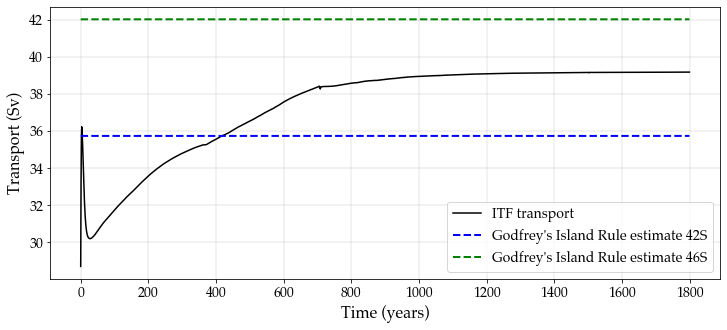

In [38]:
#GODFREYS ISLAND RULE - WIND2 - Path 42S and Path 46S
a = 0
b = 1800

plt.rcParams["figure.figsize"] = (12,5)
plt.ylabel('Transport (Sv)')
plt.xlabel('Time (years)')
plt.grid(color='grey', linestyle='-', linewidth=.2)
#plt.title('PSI 1800 years - wind2 - Original IR')
plt.plot(-PSI2_A[a:b],color = 'black',label='ITF transport')
plt.plot(ITF42w2[a:b], color='blue', linestyle='dashed', linewidth=2, label='Godfrey\'s Island Rule estimate 42S')
plt.plot(ITF46w2[a:b], color='green', linestyle='dashed', linewidth=2,label='Godfrey\'s Island Rule estimate 46S')
plt.legend()
plt.xticks(np.arange(a, b+1, 200.0))
plt.savefig('R_PSI_GIR_w2.png', dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
# AMENDED ISLAND RULE - WIND2 - 42S
a = 0
b = 1800

plt.rcParams["figure.figsize"] = (12,6)
plt.ylabel('Transport (Sv)')
plt.xlabel('Time (years)')
plt.grid(color='grey', linestyle='dashed', linewidth=.2)
#plt.title('PSI 1800 years - wind2 - Amended IR')
plt.plot(-PSI2_01800_17[a:b],color = 'black',label='ITF transport')
plt.plot(ITF42w2[a:b], color='blue',     linestyle='dashed', label='Godfrey\'s Island Rule estimate 42S')
plt.plot(ITF42w2[a:b]+c1*upwell2z5[a:b], color='pink', linewidth=2,linestyle='dashed', label='Amended Island Rule, z = -1810m')
plt.plot(ITF42w2[a:b]+c1*upwell2z6[a:b], color='coral', linewidth=2,linestyle='dashed', label='Amended Island Rule, z = -1420m')
plt.plot(ITF42w2[a:b]+c1*upwell2z7[a:b], color='red', linewidth=2,linestyle='dashed', label='Amended Island Rule, z = -1080m')
#plt.plot(PSI2_01800_16[a:b],color = 'teal',label='PSI w1 _ exact')
plt.legend()
plt.xticks(np.arange(a, b+1, 200.0))
plt.yticks(np.arange(18.0, 48.0, 2))
plt.savefig('R_PSI_AIR_w2_42S.png', dpi=300,bbox_inches='tight')
plt.show()

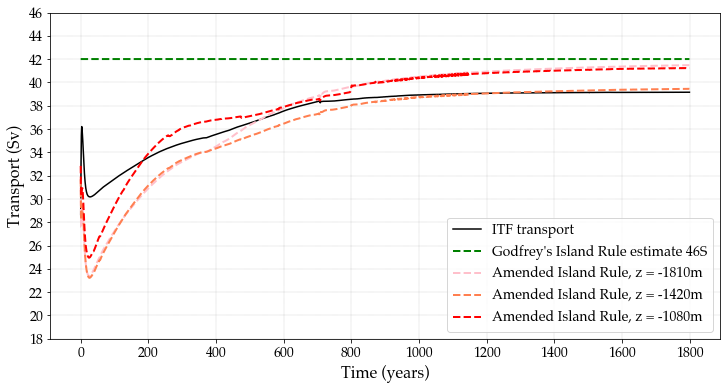

In [25]:
# AMENDED ISLAND RULE - WIND2 - 46S
a = 0
b = 1800

plt.rcParams["figure.figsize"] = (12,6)
plt.ylabel('Transport (Sv)')
plt.xlabel('Time (years)')
plt.grid(color='grey', linestyle='dashed', linewidth=.2)
#plt.title('PSI 1800 years - wind2 - Amended IR')
plt.plot(-PSI2_A[a:b],color = 'black',label='ITF transport')
plt.plot(ITF46w2[a:b], color='green', linestyle='dashed', linewidth=2,label='Godfrey\'s Island Rule estimate 46S')
plt.plot(ITF46w2[a:b]+c1*upwell2z5[a:b], color='pink', linewidth=2,linestyle='dashed', label='Amended Island Rule, z = -1810m')
plt.plot(ITF46w2[a:b]+c1*upwell2z6[a:b], color='coral', linewidth=2,linestyle='dashed', label='Amended Island Rule, z = -1420m')
plt.plot(ITF46w2[a:b]+c1*upwell2z7[a:b], color='red', linewidth=2,linestyle='dashed', label='Amended Island Rule, z = -1080m')
#plt.plot(PSI2_01800_16[a:b],color = 'teal',label='PSI w1 _ exact')
plt.legend()
plt.xticks(np.arange(a, b+1, 200.0))
plt.yticks(np.arange(18.0, 48.0, 2))
plt.savefig('R_PSI_AIR_w2_46S.png', dpi=300,bbox_inches='tight')
plt.show()

## Results for upwelling

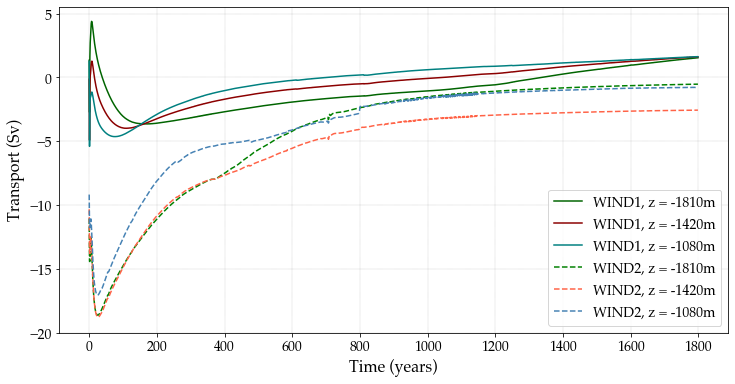

In [99]:
# Upwelling - WIND1 compared to WIND2
a = 0
b = 1800

plt.rcParams["figure.figsize"] = (12,6)
plt.ylabel('Transport (Sv)')
plt.xlabel('Time (years)')
plt.grid(color='grey', linestyle='dashed', linewidth=.2)
#plt.title('Upwelling calculated using vertical speed at different depths - wind 1')
plt.plot(-upwell1z5[a:b], color ='darkgreen', label='WIND1, z = -1810m')
plt.plot(-upwell1z6[a:b], color ='darkred', label='WIND1, z = -1420m')
plt.plot(-upwell1z7[a:b], color ='teal', label='WIND1, z = -1080m')
plt.plot(-upwell2z5[a:b], color ='green', linestyle='dashed',label='WIND2, z = -1810m')
plt.plot(-upwell2z6[a:b], color ='tomato',linestyle='dashed',label='WIND2, z = -1420m')
plt.plot(-upwell2z7[a:b], color ='steelblue',linestyle='dashed',label='WIND2, z = -1080m')
plt.legend()
plt.plot(figsize=(20, 1))
plt.xticks(np.arange(a, b+1, 200.0))
plt.yticks(np.arange(-20, 10, 5.0))
plt.savefig('R_upwell_W1W1_46.png', dpi=300,bbox_inches='tight')
plt.show()

# Comparison of the Island Rules

## WIND1

In [24]:
line_0 = np.empty(1800)
line_0.fill(0)

In [39]:
# Calculating percentage difference:
fact = 100/-PSI1_01800_17

# Difference between GIR and PSI, AIR and PSI
diffGIR_w1_42 = fact*(ITF42w1+PSI1_01800_17)
diffGIR_w1_46 = fact*(ITF46w1+PSI1_01800_17)

diffAIR_w1_42_1810 = fact*(ITF42w1+c1*upwell1z5+PSI1_01800_17)
diffAIR_w1_42_1420 = fact*(ITF42w1+c1*upwell1z6+PSI1_01800_17)
diffAIR_w1_42_1080 = fact*(ITF42w1+c1*upwell1z7+PSI1_01800_17)

diffAIR_w1_46_1810 = fact*(ITF46w1+c1*upwell1z5+PSI1_01800_17)
diffAIR_w1_46_1420 = fact*(ITF46w1+c1*upwell1z6+PSI1_01800_17)
diffAIR_w1_46_1080 = fact*(ITF46w1+c1*upwell1z7+PSI1_01800_17)

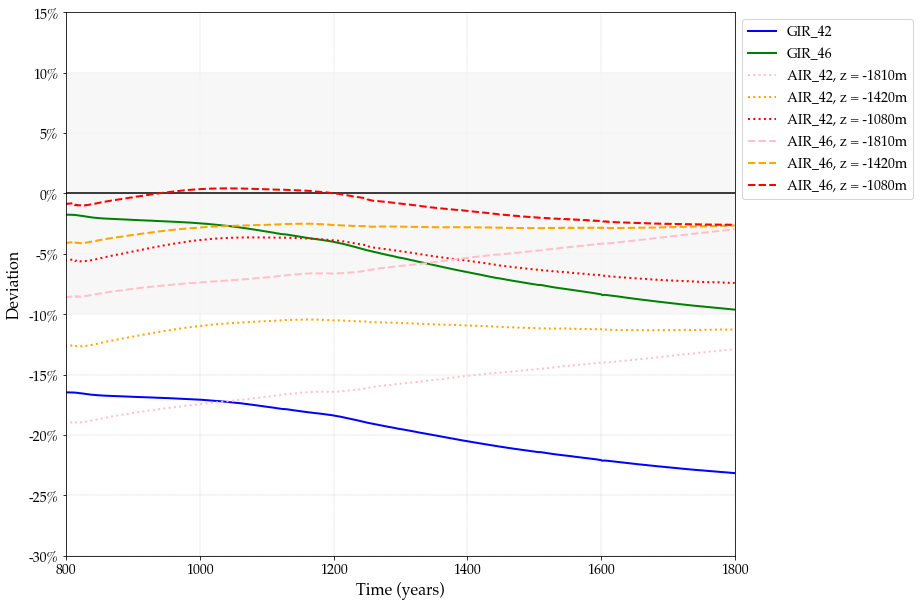

In [102]:
# PLOT RESULTS
plt.rcParams["figure.figsize"] = (12,10)
plt.ylabel('Deviation')
plt.xlabel('Time (years)')
plt.plot(line_0, color = 'whitesmoke', linewidth = 242,alpha=0.7)
plt.grid(color='grey', linestyle='dashed', linewidth=.2)
plt.plot(line_0, color ='k')
plt.plot(diffGIR_w1_42, linewidth=2,linestyle = 'solid', color ='blue', label='GIR_42')
plt.plot(diffGIR_w1_46, linewidth=2,linestyle = 'solid', color ='green', label='GIR_46')
plt.plot(diffAIR_w1_42_1810, linewidth=2,linestyle = 'dotted',color ='pink', label='AIR_42, z = -1810m')
plt.plot(diffAIR_w1_42_1420, linewidth=2,linestyle = 'dotted',color ='orange',label='AIR_42, z = -1420m')
plt.plot(diffAIR_w1_42_1080, linewidth=2,linestyle = 'dotted',color ='red',label='AIR_42, z = -1080m')
plt.plot(diffAIR_w1_46_1810, linewidth=2,linestyle = 'dashed',color ='pink', label='AIR_46, z = -1810m')
plt.plot(diffAIR_w1_46_1420, linewidth=2,linestyle = 'dashed',color ='orange', label='AIR_46, z = -1420m')
plt.plot(diffAIR_w1_46_1080, linewidth=2,linestyle = 'dashed',color ='red', label='AIR_46, z = -1080m')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(-30, 15)
plt.xlim(800, 1800)
plt.xticks(np.arange(800, b+1, 200.0))
#plt.yticks(np.arange(-.35, .20, 5.0))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()]) 
plt.savefig('R_percentage_w1.png', dpi=300,bbox_inches='tight')
plt.show()

## WIND 2


In [75]:
# Calculating percentage difference:
fact = 100/-PSI2_01800_17

# Difference between GIR and PSI, AIR and PSI
diffGIR_w2_42 = fact*(ITF42w2+PSI2_01800_17)
diffGIR_w2_46 = fact*(ITF46w2+PSI2_01800_17)

diffAIR_w2_42_1810 = fact*(ITF42w2+c1*upwell2z5+PSI2_01800_17)
diffAIR_w2_42_1420 = fact*(ITF42w2+c1*upwell2z6+PSI2_01800_17)
diffAIR_w2_42_1080 = fact*(ITF42w2+c1*upwell2z7+PSI2_01800_17)

diffAIR_w2_46_1810 = fact*(ITF46w2+c1*upwell2z5+PSI2_01800_17)
diffAIR_w2_46_1420 = fact*(ITF46w2+c1*upwell2z6+PSI2_01800_17)
diffAIR_w2_46_1080 = fact*(ITF46w2+c1*upwell2z7+PSI2_01800_17)

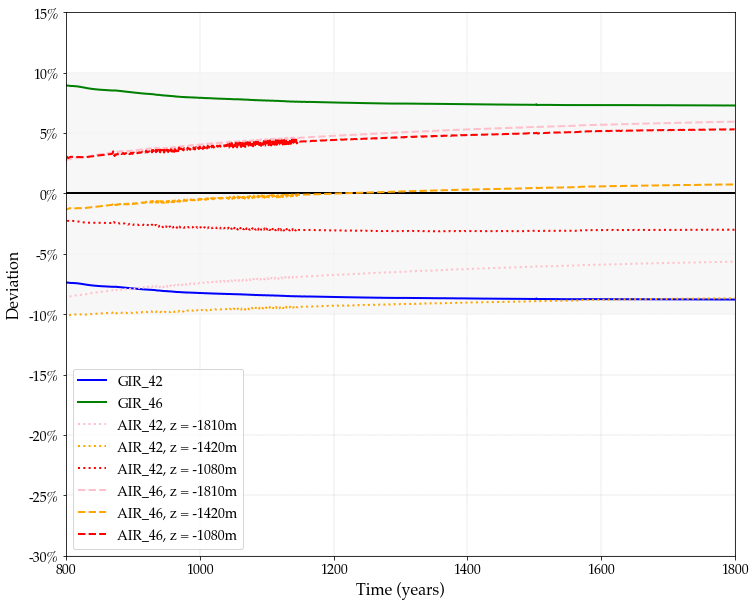

In [105]:
# PLOT RESULTS
plt.rcParams["figure.figsize"] = (12,10)
plt.ylabel('Deviation')
plt.xlabel('Time (years)')
plt.plot(line_0, color = 'whitesmoke', linewidth = 242,alpha=0.7)
plt.grid(color='grey', linestyle='dashed', linewidth=.2)
plt.plot(line_0, color ='k',linewidth=2)
plt.plot(diffGIR_w2_42, linewidth=2,linestyle = 'solid', color ='blue', label='GIR_42')
plt.plot(diffGIR_w2_46, linewidth=2,linestyle = 'solid', color ='green', label='GIR_46')
plt.plot(diffAIR_w2_42_1810, linewidth=2,linestyle = 'dotted', color ='pink', label='AIR_42, z = -1810m')
plt.plot(diffAIR_w2_42_1420, linewidth=2,linestyle = 'dotted', color ='orange',label='AIR_42, z = -1420m')
plt.plot(diffAIR_w2_42_1080, linewidth=2,linestyle = 'dotted', color ='red',label='AIR_42, z = -1080m')
plt.plot(diffAIR_w2_46_1810, linewidth=2,linestyle = 'dashed', color ='pink', label='AIR_46, z = -1810m')
plt.plot(diffAIR_w2_46_1420, linewidth=2,linestyle = 'dashed', color ='orange', label='AIR_46, z = -1420m')
plt.plot(diffAIR_w2_46_1080, linewidth=2,linestyle = 'dashed', color ='red', label='AIR_46, z = -1080m')
plt.legend()
plt.ylim(-30, 15)
plt.xlim(800, 1800)
#plt.plot(figsize=(20, 1))
plt.xticks(np.arange(800, b+1, 200.0))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()]) 
#plt.yticks(np.arange(55, 60, 10))
plt.savefig('R_percentage_w2.png', dpi=300,bbox_inches='tight')
plt.show()

# APPENDIX PLOTS

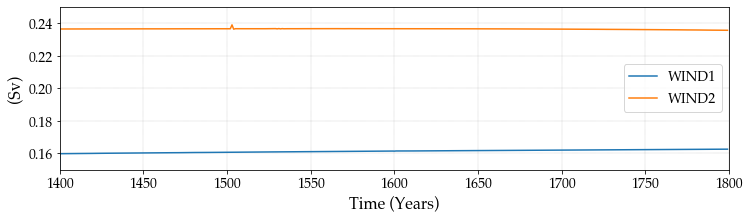

In [22]:
# Difference exact PSI and PSI - wind 1
plt.rcParams["figure.figsize"] = (12,3)
plt.grid(color='grey', linestyle='dashed', linewidth=.2)
plt.ylabel('Transport (Sv)')
plt.xlabel('Time (Years)')
#plt.title('Difference PSI WIND1')
plt.plot(PSI1_01800_16[0:1800]-PSI1_01800_17[0:1800],label='WIND1')
plt.plot(PSI2_01800_16[0:1800]-PSI2_01800_17[0:1800],label='WIND2')
plt.xlim(xmin=1400, xmax=1800)
plt.ylim(ymin=0.15, ymax=0.25)
plt.yticks(np.arange(0.16, 0.25, .02))
plt.legend()
plt.savefig('A_DifferencePSI_W1W2.png', dpi=300,bbox_inches='tight')
plt.show()

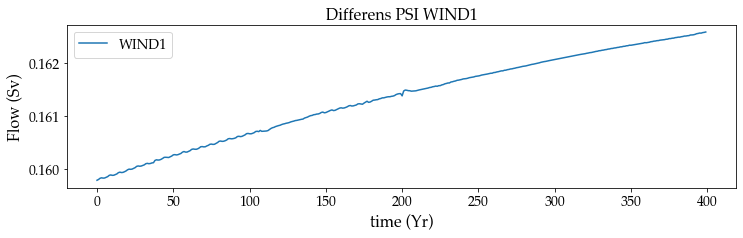

In [61]:
# Difference exact PSI and PSI - WIND1
plt.ylabel('Flow (Sv)')
plt.xlabel('time (Yr)')
plt.title('Differens PSI WIND1')
plt.plot(PSI1_01800_16[1400:1800]-PSI1_01800_17[1400:1800],label='WIND1')
plt.legend()
plt.show()

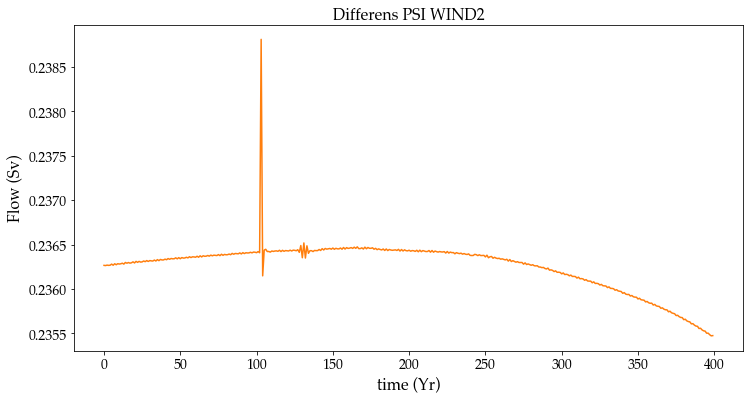

In [53]:
# Difference exact PSI and PSI - WIND2
plt.ylabel('Flow (Sv)')
plt.xlabel('time (Yr)')
plt.title('Differens PSI WIND2')
plt.plot(PSI2_01800_16[1400:1800]-PSI2_01800_17[1400:1800],color = 'C1',label='Difference PSI')
plt.show()